In [81]:
# For reading our data set
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# For building our net
import keras
# Need this for LabelEncoder
from sklearn import preprocessing

## Read in data

In [82]:
student_data = np.array(pandas.read_table("./student-por.csv",
delimiter=";", header=0))

student_data

array([['GP', 'F', 18, ..., 0, 11, 11],
       ['GP', 'F', 17, ..., 9, 11, 11],
       ['GP', 'F', 15, ..., 12, 13, 12],
       ...,
       ['MS', 'F', 18, ..., 11, 12, 9],
       ['MS', 'M', 17, ..., 10, 10, 10],
       ['MS', 'M', 18, ..., 10, 11, 11]], dtype=object)

# Data Cleanup

## Shuffle data

In [83]:
np.random.shuffle(student_data)

student_data

array([['GP', 'F', 15, ..., 10, 10, 10],
       ['GP', 'M', 18, ..., 11, 10, 11],
       ['MS', 'F', 16, ..., 9, 8, 8],
       ...,
       ['GP', 'F', 16, ..., 15, 16, 16],
       ['GP', 'M', 17, ..., 12, 13, 13],
       ['GP', 'F', 18, ..., 18, 18, 18]], dtype=object)

## Numerically classify scores

In [84]:
scores = student_data[:,32]

In [85]:
for i in range(len(scores)):
    if(scores[i] > 18):
        scores[i] = 4
    elif(scores[i] > 16):
        scores[i] = 3
    elif(scores[i] > 14):
        scores[i] = 2
    elif(scores[i] > 12):
        scores[i] = 1
    else:
        scores[i] = 0

In [86]:
for i in range(len(scores)):
    student_data[i,32] = scores[i]
    
student_data

array([['GP', 'F', 15, ..., 10, 10, 0],
       ['GP', 'M', 18, ..., 11, 10, 0],
       ['MS', 'F', 16, ..., 9, 8, 0],
       ...,
       ['GP', 'F', 16, ..., 15, 16, 2],
       ['GP', 'M', 17, ..., 12, 13, 1],
       ['GP', 'F', 18, ..., 18, 18, 3]], dtype=object)

## Encoding non-numeric data to integers

In [87]:
# one student sample
student_data[0,:]

array(['GP', 'F', 15, 'U', 'GT3', 'T', 2, 2, 'other', 'other', 'course',
       'mother', 1, 4, 0, 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 5, 1, 2, 1, 1, 3, 4, 10, 10, 0], dtype=object)

In [88]:
le = preprocessing.LabelEncoder()

# columns that hold non-numeric data
indices = np.array([0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22])

# transform the non-numeric data in these columns to integers
for i in range(len(indices)):
    column = indices[i]
    le.fit(student_data[:,column])
    student_data[:,column] = le.transform(student_data[:,column])

In [89]:
student_data[0,:]

array([0, 0, 15, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 5, 1, 2, 1, 1, 3, 4, 10, 10, 0], dtype=object)

## Encoding 0's to -1 for binomial data.

In [90]:
# columns that hold binomial data
indices = np.array([0,1,3,4,5,15,16,17,18,19,20,21,22])

# change 0's to -1's
for i in range(len(indices)):
    j = indices[i]
    feature = student_data[:,j]
    feature = np.where(feature==0, -1, feature)
    student_data[:,j] = feature

In [91]:
student_data[0,:]

array([-1, -1, 15, 1, -1, 1, 2, 2, 2, 2, 0, 1, 1, 4, 0, 1, 1, -1, -1, 1,
       1, 1, -1, 5, 1, 2, 1, 1, 3, 4, 10, 10, 0], dtype=object)

## Standardizing the nominal and numerical data.

In [92]:
scaler = preprocessing.StandardScaler()

In [93]:
temp = student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]]
Standardized = scaler.fit_transform(temp)

/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [94]:
print('Mean:', round(Standardized.mean()))
print('Standard deviation:', Standardized.std())

Mean: -0.0
Standard deviation: 1.0


In [95]:
student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]] = Standardized

In [96]:
student_data[0,:]

array([-1, -1, -1.4329802763043944, 1, -1, 1, -0.45395437895764235,
       -0.2789830500314615, 0.04694063202738386, -0.2607275884816344,
       -0.9339740507872134, 0.3326475069742608, -0.7600319244561619,
       2.4965758093572377, -0.3743051181921297, 1, 1, -1, -1, 1, 1, 1, -1,
       1.1197481596133516, -2.075896134322357, -1.0085456232078611,
       -0.5435553304269218, -0.9976946599159401, -0.3710421971530383,
       0.07343336415121458, -0.510025280859686, -0.5392977905705323, 0],
      dtype=object)

## Convert results to one-hot encoding

In [97]:
# final grades
results = student_data[:,32]

# all unique values for final grades (0-4)
possible_results = Matrix(np.unique(student_data[:,32])).T

In [98]:
# one-hot encode final grades which will be used as our output
y = keras.utils.to_categorical(results,len(possible_results))

In [99]:
y[0:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [100]:
# our input, all features except final grades
x = student_data[:,0:32]

# Model Building

In [125]:
def create_network(model):
    # specify input/output size
    input_size = x.shape[1]
    output_size = y.shape[1]

    # creeate the hidden layer
    model.add(keras.layers.Dense(800, input_dim = input_size, activation = 'relu'))

    # additional hidden layer
    model.add(keras.layers.Dense(400,activation='relu'))

    # output layer
    model.add(keras.layers.Dense(output_size,activation='softmax'))

    # compile - why using adamax?
    model.compile(loss='categorical_crossentropy',
                  optimizer='adamax', 
                  metrics=['accuracy'])

In [126]:
model = keras.Sequential()
create_network(model)

# Initial Test of the Network

In [103]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

y_train = y[0:518,:]
y_test = y[519:649,:]

In [104]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [105]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20647848156782297
Test accuracy: 0.9307692307692308


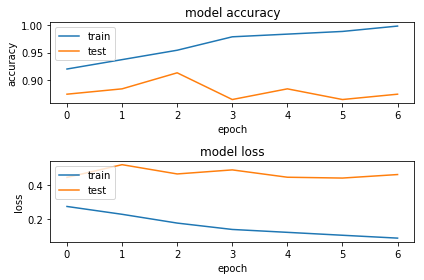

In [106]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without first input

In [121]:
x = student_data[:,1:32]

In [127]:
model = keras.Sequential()
create_network(model)

In [128]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [129]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [130]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5720421424278846
Test accuracy: 0.7307692307692307


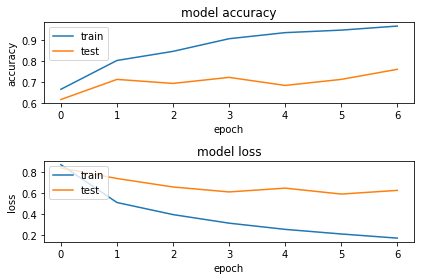

In [131]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without second input

In [148]:
x = np.delete(student_data, 1, axis = 1)

In [149]:
model = keras.Sequential()
create_network(model)

In [150]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [151]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [153]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17258468362001272
Test accuracy: 0.9230769230769231


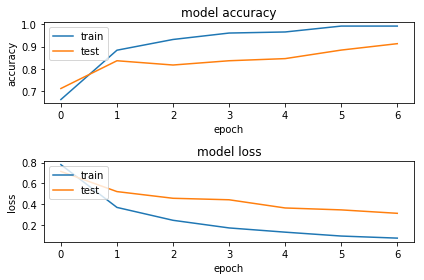

In [154]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without third input

In [155]:
x = np.delete(student_data, 2, axis = 1)

In [156]:
model = keras.Sequential()
create_network(model)

In [157]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [158]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [159]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22644027379842904
Test accuracy: 0.9230769230769231


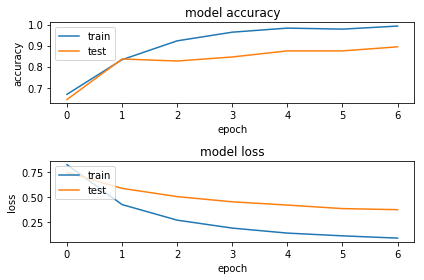

In [160]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fourth input

In [161]:
x = np.delete(student_data, 3, axis = 1)

In [162]:
model = keras.Sequential()
create_network(model)

In [163]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [164]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [165]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20195112228393555
Test accuracy: 0.9230769230769231


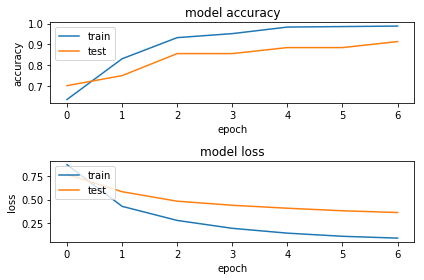

In [166]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fifth input

In [167]:
x = np.delete(student_data, 4, axis = 1)

In [168]:
model = keras.Sequential()
create_network(model)

In [169]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [170]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [171]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22318379053702722
Test accuracy: 0.9230769230769231


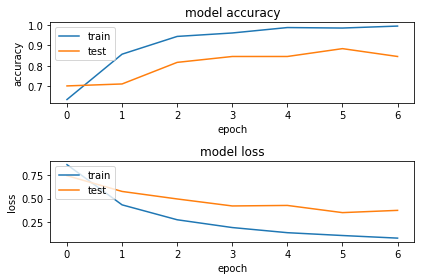

In [172]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without sixth input

In [173]:
x = np.delete(student_data, 5, axis = 1)

In [174]:
model = keras.Sequential()
create_network(model)

In [175]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [176]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [177]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.205326908826828
Test accuracy: 0.9307692307692308


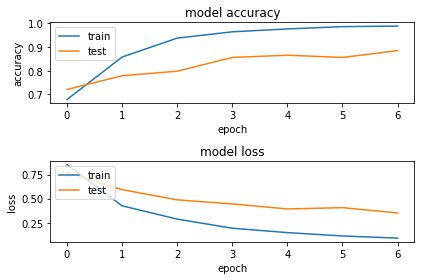

In [179]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without seventh input

In [180]:
x = np.delete(student_data, 6, axis = 1)

In [181]:
model = keras.Sequential()
create_network(model)

In [182]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [183]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [184]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1693934128834651
Test accuracy: 0.9307692307692308


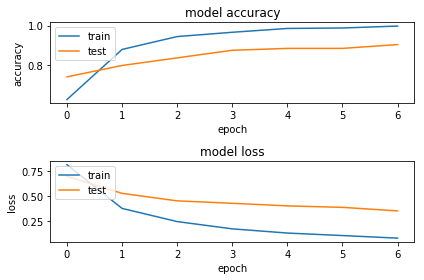

In [185]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without eighth input

In [186]:
x = np.delete(student_data, 7, axis = 1)

In [187]:
model = keras.Sequential()
create_network(model)

In [188]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [189]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [190]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17622031615330622
Test accuracy: 0.9384615384615385


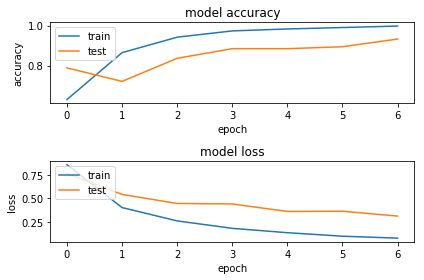

In [191]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without ninth input

In [192]:
x = np.delete(student_data, 8, axis = 1)

In [193]:
model = keras.Sequential()
create_network(model)

In [194]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [195]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [196]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16587845912346474
Test accuracy: 0.9615384615384616


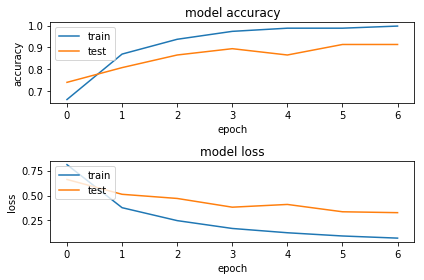

In [197]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without tenth input

In [198]:
x = np.delete(student_data, 9, axis = 1)

In [199]:
model = keras.Sequential()
create_network(model)

In [200]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [201]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [202]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18273694056731005
Test accuracy: 0.9461538461538461


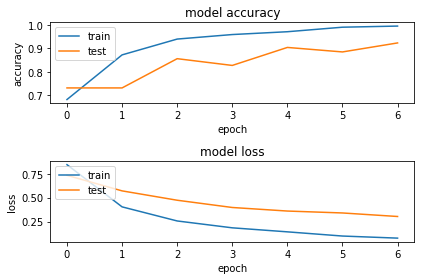

In [203]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without eleventh input

In [204]:
x = np.delete(student_data, 10, axis = 1)

In [205]:
model = keras.Sequential()
create_network(model)

In [206]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [207]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [208]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2254442205795875
Test accuracy: 0.9076923076923077


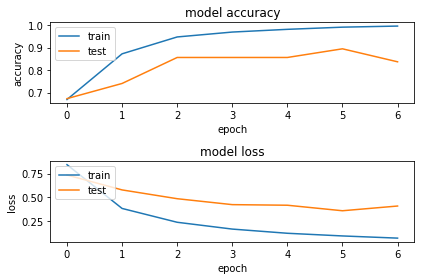

In [209]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twelvth input

In [211]:
x = np.delete(student_data, 11, axis = 1)

In [212]:
model = keras.Sequential()
create_network(model)

In [213]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [214]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [215]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18089505892533522
Test accuracy: 0.9230769230769231


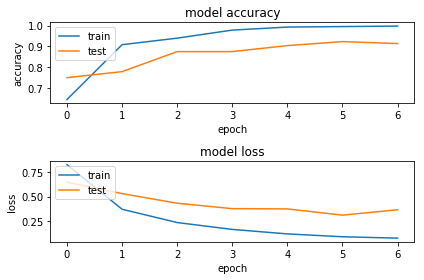

In [216]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirteenth input

In [217]:
x = np.delete(student_data, 12, axis = 1)

In [218]:
model = keras.Sequential()
create_network(model)

In [219]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [220]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [221]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20286852579850417
Test accuracy: 0.9153846153846154


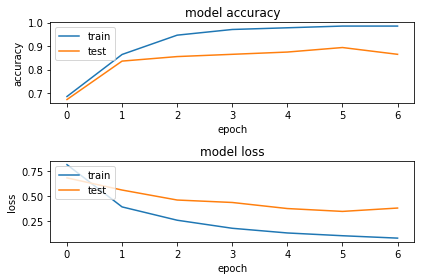

In [222]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fourteenth input

In [223]:
x = np.delete(student_data, 13, axis = 1)

In [224]:
model = keras.Sequential()
create_network(model)

In [225]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [226]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [227]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1814580330481896
Test accuracy: 0.9230769230769231


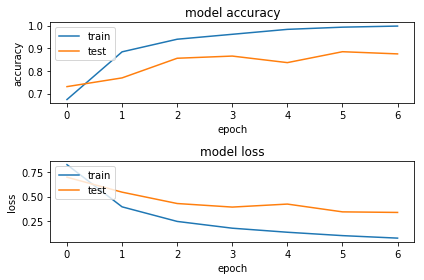

In [228]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fifteenth input

In [229]:
x = np.delete(student_data, 14, axis = 1)

In [230]:
model = keras.Sequential()
create_network(model)

In [231]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [232]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [233]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20520858122752264
Test accuracy: 0.9


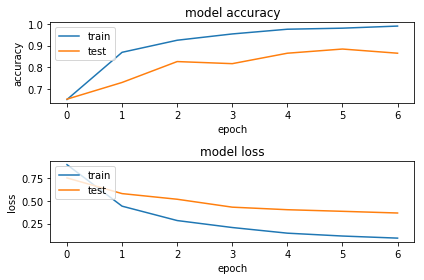

In [234]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without sixteenth input

In [235]:
x = np.delete(student_data, 15, axis = 1)

In [236]:
model = keras.Sequential()
create_network(model)

In [237]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [238]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [239]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1765161661001352
Test accuracy: 0.9384615384615385


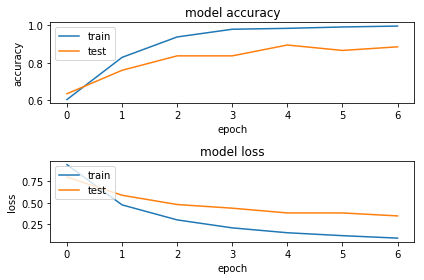

In [240]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without seventeenth input

In [241]:
x = np.delete(student_data, 16, axis = 1)

In [242]:
model = keras.Sequential()
create_network(model)

In [243]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [244]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [245]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1961586085649637
Test accuracy: 0.9


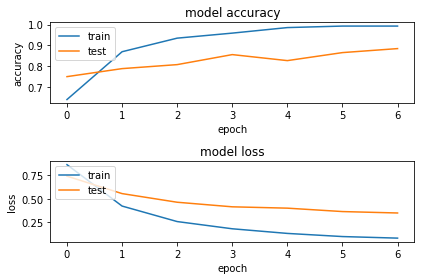

In [246]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without eighteenth input

In [247]:
x = np.delete(student_data, 17, axis = 1)

In [248]:
model = keras.Sequential()
create_network(model)

In [249]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [250]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [251]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2155813712340135
Test accuracy: 0.9076923076923077


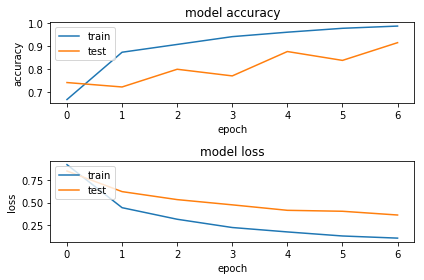

In [252]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without nineteenth input

In [253]:
x = np.delete(student_data, 18, axis = 1)

In [254]:
model = keras.Sequential()
create_network(model)

In [255]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [256]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [257]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1966120440226335
Test accuracy: 0.9153846153846154


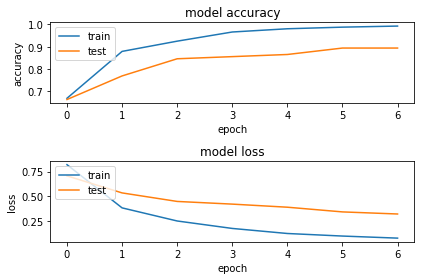

In [258]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twentieth input

In [259]:
x = np.delete(student_data, 19, axis = 1)

In [260]:
model = keras.Sequential()
create_network(model)

In [261]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [262]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [263]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18932431386067317
Test accuracy: 0.9307692307692308


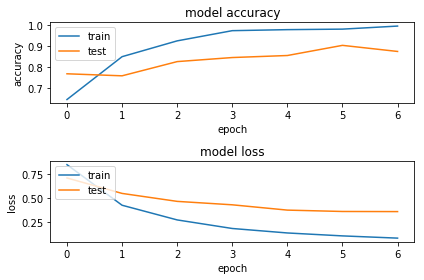

In [264]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-first input

In [265]:
x = np.delete(student_data, 20, axis = 1)

In [266]:
model = keras.Sequential()
create_network(model)

In [267]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [268]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [273]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17750395903220542
Test accuracy: 0.9384615384615385


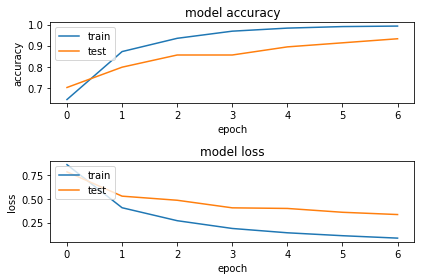

In [274]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-second input

In [275]:
x = np.delete(student_data, 21, axis = 1)

In [276]:
model = keras.Sequential()
create_network(model)

In [277]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [278]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [279]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17209071929638203
Test accuracy: 0.9538461538461539


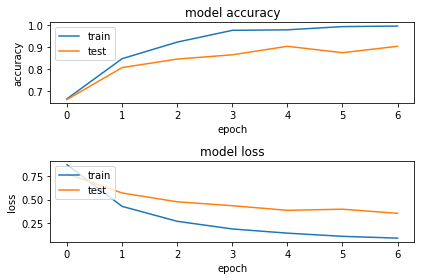

In [280]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-third input

In [281]:
x = np.delete(student_data, 22, axis = 1)

In [282]:
model = keras.Sequential()
create_network(model)

In [283]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [284]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [285]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19316417620732235
Test accuracy: 0.9076923076923077


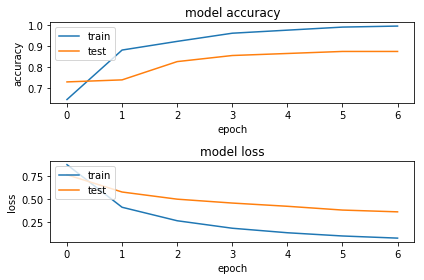

In [286]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-fourth input

In [287]:
x = np.delete(student_data, 23, axis = 1)

In [288]:
model = keras.Sequential()
create_network(model)

In [289]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [290]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [291]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18558760056128867
Test accuracy: 0.9384615384615385


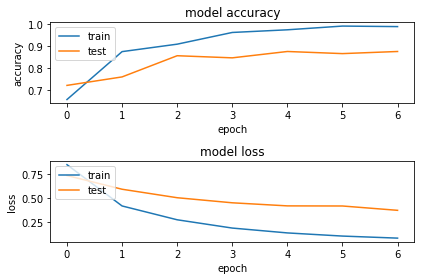

In [292]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-fifth input

In [293]:
x = np.delete(student_data, 24, axis = 1)

In [294]:
model = keras.Sequential()
create_network(model)

In [295]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [296]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [297]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1870101740727058
Test accuracy: 0.9230769230769231


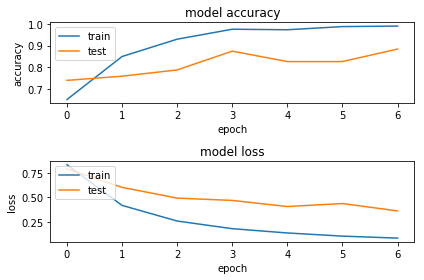

In [298]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-sixth input

In [299]:
x = np.delete(student_data, 25, axis = 1)

In [300]:
model = keras.Sequential()
create_network(model)

In [301]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [302]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [303]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21362849932450514
Test accuracy: 0.9076923076923077


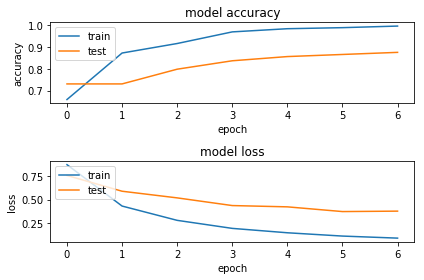

In [304]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-seventh input

In [305]:
x = np.delete(student_data, 26, axis = 1)

In [306]:
model = keras.Sequential()
create_network(model)

In [307]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [308]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [309]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18067449056185209
Test accuracy: 0.9384615384615385


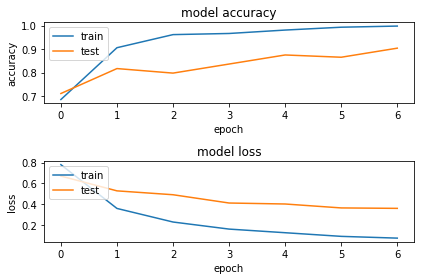

In [310]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-eighth input

In [311]:
x = np.delete(student_data, 27, axis = 1)

In [312]:
model = keras.Sequential()
create_network(model)

In [313]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [314]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [315]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19602059767796443
Test accuracy: 0.9384615384615385


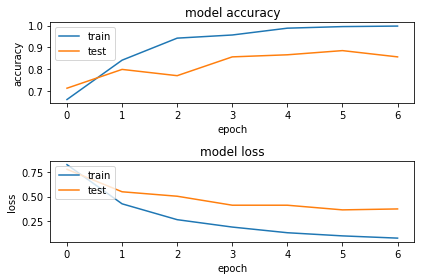

In [316]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-ninth input

In [317]:
x = np.delete(student_data, 28, axis = 1)

In [318]:
model = keras.Sequential()
create_network(model)

In [319]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [320]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [321]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19009450857455915
Test accuracy: 0.9307692307692308


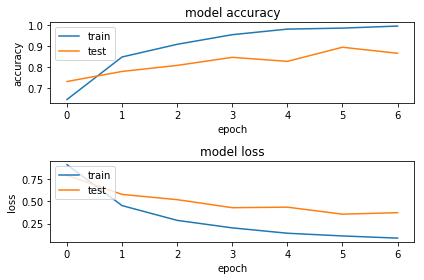

In [322]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirtieth input

In [323]:
x = np.delete(student_data, 29, axis = 1)

In [324]:
model = keras.Sequential()
create_network(model)

In [325]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [326]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [327]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17995465168586144
Test accuracy: 0.9230769230769231


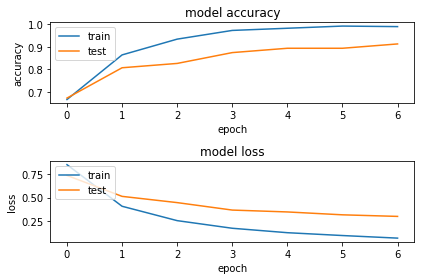

In [328]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirty-first input

In [329]:
x = np.delete(student_data, 30, axis = 1)

In [330]:
model = keras.Sequential()
create_network(model)

In [331]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [332]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [333]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19904211301069993
Test accuracy: 0.9384615384615385


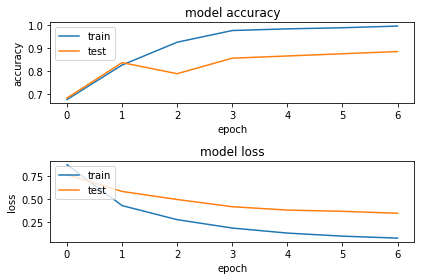

In [334]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirty-second input

In [335]:
x = np.delete(student_data, 31, axis = 1)

In [336]:
model = keras.Sequential()
create_network(model)

In [337]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [338]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [339]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2527713436346788
Test accuracy: 0.9153846153846154


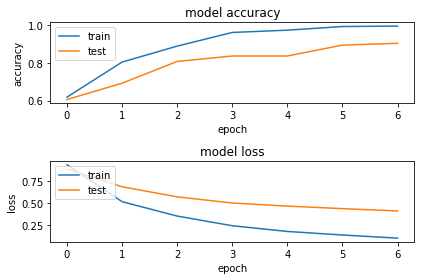

In [340]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirty-third input

In [341]:
x = np.delete(student_data, 32, axis = 1)

In [342]:
model = keras.Sequential()
create_network(model)

In [343]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [ ]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [153]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17258468362001272
Test accuracy: 0.9230769230769231


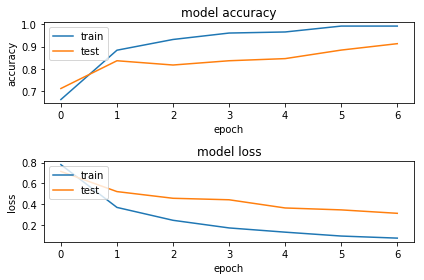

In [154]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()